<a href="https://colab.research.google.com/github/misrapk/Deep-Learning-Course-YT/blob/main/03PreTrainedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow.keras import Sequential, layers

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
print("Shape of X_train, ", X_train_full.shape)
print("Shape of y_train, ", y_train_full.shape)
print("Shape of X_test, ", X_test.shape)
print("Shape of y_test, ", y_test.shape)

print('Data Type: ', X_train_full.dtype)


Shape of X_train,  (60000, 28, 28)
Shape of y_train,  (60000,)
Shape of X_test,  (10000, 28, 28)
Shape of y_test,  (10000,)
Data Type:  uint8


Let's split the fashion MNIST training set in two:

1. X_train_A: all images of all items except for T-shirts/tops and pullovers (classes 0 and 2).
2. X_train_B: a much smaller training set of just the first 200 images of T-shirts/tops and pullovers.

In [ ]:
class_pos_id = class_names.index('Pullover')  #positive
class_neg_id = class_names.index('T-shirt/top')   #neg

class_pos_id, class_neg_id

(2, 0)

In [ ]:
y = y_train
y[~((y==class_pos_id) |(y==class_neg_id))]
print((y[y[~((y==class_pos_id) |(y==class_neg_id))]] == class_pos_id).astype(np.float32))

[0. 0. 1. ... 0. 0. 0.]


In [ ]:
def split_dataset(X, y):
    y_for_B = (y == class_pos_id) | (y == class_neg_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == class_pos_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([class_neg_id, class_pos_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

In [ ]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
# prompt: printshape of all the above datapoints

print("Shape of X_train_A, ", X_train_A.shape)
print("Shape of y_train_A, ", y_train_A.shape)
print("Shape of X_valid_A, ", X_valid_A.shape)
print("Shape of y_valid_A, ", y_valid_A.shape)
print("Shape of X_test_A, ", X_test_A.shape)
print("Shape of y_test_A, ", y_test_A.shape)
print("Shape of X_train_B, ", X_train_B.shape)
print("Shape of y_train_B, ", y_train_B.shape)
print("Shape of X_valid_B, ", X_valid_B.shape)
print("Shape of y_valid_B, ", y_valid_B.shape)
print("Shape of X_test_B, ", X_test_B.shape)
print("Shape of y_test_B, ", y_test_B.shape)


Shape of X_train_A,  (44011, 28, 28)
Shape of y_train_A,  (44011,)
Shape of X_valid_A,  (3989, 28, 28)
Shape of y_valid_A,  (3989,)
Shape of X_test_A,  (8000, 28, 28)
Shape of y_test_A,  (8000,)
Shape of X_train_B,  (200, 28, 28)
Shape of y_train_B,  (200,)
Shape of X_valid_B,  (1011, 28, 28)
Shape of y_valid_B,  (1011,)
Shape of X_test_B,  (2000, 28, 28)
Shape of y_test_B,  (2000,)


In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_A.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

history_A = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save('myModelA.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4982 - loss: 1.5041 - val_accuracy: 0.7761 - val_loss: 0.6989
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7937 - loss: 0.6459 - val_accuracy: 0.8228 - val_loss: 0.5230
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8387 - loss: 0.5034 - val_accuracy: 0.8461 - val_loss: 0.4476
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4348 - val_accuracy: 0.8576 - val_loss: 0.4047
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8677 - loss: 0.3937 - val_accuracy: 0.8684 - val_loss: 0.3769
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8757 - loss: 0.3666 - val_accuracy: 0.8739 - val_loss: 0.3582
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8820 - loss: 0.3476 - val_accuracy: 0.8764 - val_loss: 0.3448
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8861 - loss: 0.3333 - 

In [ ]:
model_A.evaluate(X_test_A, y_test_A)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.3010


[0.30061641335487366, 0.8928750157356262]

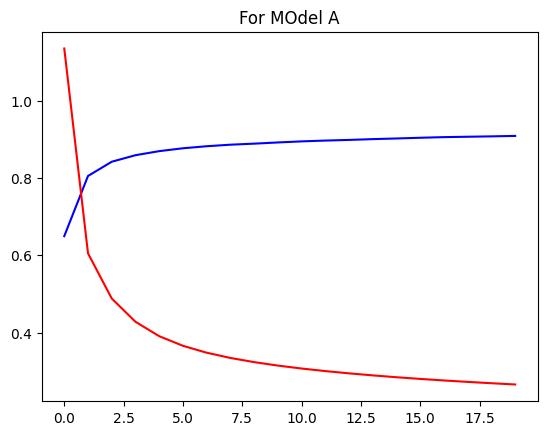

In [ ]:
plt.plot(history_A.history['accuracy'], 'b-')
plt.plot(history_A.history['loss'], 'r-')
plt.title('For MOdel A')
plt.show()


## For Model B

In [ ]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='softmax')

])
model_B.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

history_B= model_A.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))
model_B.save('myModelB.keras')

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.0692 - loss: 4.3930 - val_accuracy: 0.2819 - val_loss: 1.9043
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2860 - loss: 1.6721 - val_accuracy: 0.4095 - val_loss: 1.2484
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4604 - loss: 1.0733 - val_accuracy: 0.5826 - val_loss: 0.9096
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6022 - loss: 0.7592 - val_accuracy: 0.6815 - val_loss: 0.7264
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7216 - loss: 0.5890 - val_accuracy: 0.7507 - val_loss: 0.6165
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8150 - loss: 0.4889 - val_accuracy: 0.7864 - val_loss: 0.5448
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8580 - loss: 0.4234 - val_accuracy: 0.8032 - val_loss: 0.4948
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8735 - loss: 0.3781 - val_accuracy: 0.8220 - val_loss: 0.4573

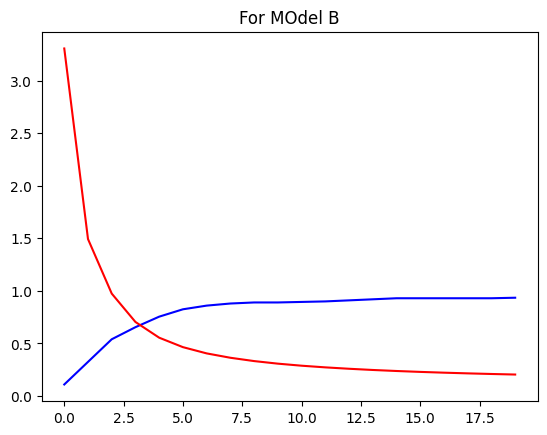

In [ ]:
plt.plot(history_B.history['accuracy'], 'b-')
plt.plot(history_B.history['loss'], 'r-')
plt.title('For MOdel B')
plt.show()


In [ ]:
model_B.evaluate(X_test_B, y_test_B)

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5145 - loss: nan


[nan, 0.5]

Model A reaches 90.82% accuracy on test set
Model B reaches 91.89% accuracy on test set

In [ ]:
model_A.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,510 (388.71 KB)

 Trainable params: 99,508 (388.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_A.layers[:-1]

[<Flatten name=flatten_5, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>,
 <Dense name=dense_23, built=True>]

In [ ]:
model_B.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,801 (385.94 KB)

 Trainable params: 98,801 (385.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model_A = tf.keras.models.load_model('myModelA.keras')
# model_BonA = tf.keras.Sequential(model_A.layers[:-1])
# model_BonA.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #output layer



In [ ]:
#first cloone then use to avoid changing the previous model
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

model_BonA = tf.keras.Sequential(model_A_clone.layers[:-1])
model_BonA.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #output layer

In [ ]:
model_BonA.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,700 (385.55 KB)

 Trainable params: 98,700 (385.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_BonA.compile(loss='binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
histroy_BonA = model_BonA.fit(X_train_B, y_train_B,
                              epochs = 10,
                              validation_data=(X_valid_B, y_valid_B))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.5726 - loss: 1.0607 - val_accuracy: 0.8922 - val_loss: 0.4546
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9082 - loss: 0.4286 - val_accuracy: 0.8863 - val_loss: 0.4444
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8939 - loss: 0.4226 - val_accuracy: 0.8981 - val_loss: 0.4263
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9115 - loss: 0.4033 - val_accuracy: 0.9070 - val_loss: 0.4082
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9115 - loss: 0.3843 - val_accuracy: 0.9120 - val_loss: 0.3917
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9223 - loss: 0.3671 - val_accuracy: 0.9149 - val_loss: 0.3771
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9273 - loss: 0.3520 - val_accuracy: 0.9189 - val_loss: 0.3641
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9400 - loss: 0.3384 - val_accuracy: 0.9228 - val_loss: 0.3524

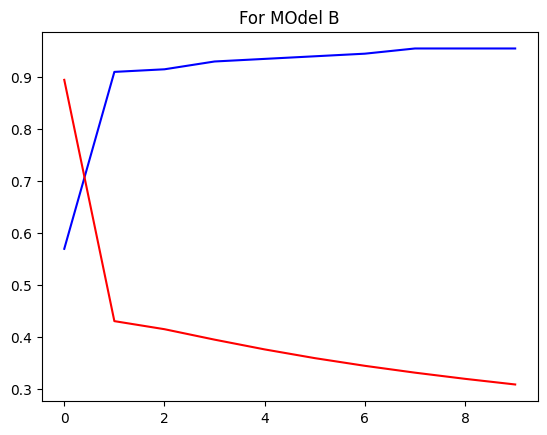

In [ ]:
plt.plot(histroy_BonA.history['accuracy'], 'b-')
plt.plot(histroy_BonA.history['loss'], 'r-')
plt.title('For MOdel B')
plt.show()


In [ ]:
model_BonA_2 = tf.keras.Sequential(model_A_clone.layers[:-1])
model_BonA_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #output layer

for layer in model_BonA_2.layers[:-1]:
  layer.trainable=False

optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.001)
model_BonA_2.compile(loss='binary_crossentropy', optimizer = optimizer2, metrics = ['accuracy'])

histroy_BonA_2 = model_BonA_2.fit(X_train_B, y_train_B,
                              epochs = 4,
                              validation_data=(X_valid_B, y_valid_B))

for layer in model_BonA_2.layers[:-1]:
  layer.trainable=True

optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.001)
model_BonA_2.compile(loss='binary_crossentropy', optimizer = optimizer2, metrics = ['accuracy'])

histroy_BonA_2 = model_BonA_2.fit(X_train_B, y_train_B,
                              epochs = 30,
                              validation_data=(X_valid_B, y_valid_B))


Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.4369 - loss: 1.1360 - val_accuracy: 0.5252 - val_loss: 0.7059
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5709 - loss: 0.6714 - val_accuracy: 0.6795 - val_loss: 0.5941
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6683 - loss: 0.5753 - val_accuracy: 0.7557 - val_loss: 0.5704
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7553 - loss: 0.5500 - val_accuracy: 0.7755 - val_loss: 0.5561
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.7755 - loss: 0.5260 - val_accuracy: 0.8180 - val_loss: 0.5102
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8427 - loss: 0.4782 - val_accuracy: 0.8437 - val_loss: 0.4717
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8816 - loss: 0.4379 - val_accuracy: 0.8635 - val_loss: 0.4403
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9145 - loss: 0.4051 - val_accuracy: 0.8833 - val_loss: 0.4143
Ep

In [ ]:
model_BonA_2.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9394 - loss: 0.2205


[0.22112460434436798, 0.9350000023841858]

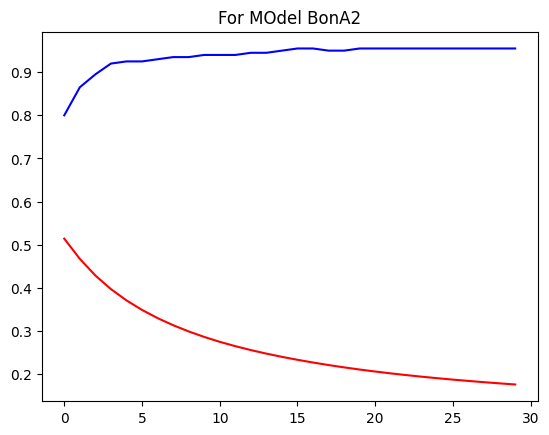

In [ ]:
plt.plot(histroy_BonA_2.history['accuracy'], 'b-')
plt.plot(histroy_BonA_2.history['loss'], 'r-')
plt.title('For MOdel BonA2')
plt.show()


Model b - 91.89%

Model B on A = 93.5%

In [ ]:
1- (100-93.5)/(100-91.89)

0.1985203452527743